In [60]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.clustering import KMeans
from matplotlib import pyplot as plt

In [61]:
spark = SparkSession.builder.getOrCreate()

In [62]:
# 1. load file
df_train = spark.read.csv("Dataset.csv", header=True, inferSchema=True)
df_train.show()

# The dataset was obtained from the Big Data Processing course.

+---+--------------------+--------+----------+-----+-------------+
| id|         sugar_level|calories|    weight|  fat|   food_color|
+---+--------------------+--------+----------+-----+-------------+
|  1|145.7699999999999...| 764 cal|1745.73 gr|46 gr| Lemon Yellow|
|  2|-4.60000000000000...| 262 cal|1903.09 gr|24 gr|    Navy Blue|
|  3|            95.81 gr| 448 cal|1539.14 gr|27 gr|Sunset Yellow|
|  4|           100.16 gr| 375 cal| 746.22 gr|11 gr|Sunset Yellow|
|  5|-8.56000000000000...|  93 cal| 134.08 gr|26 gr|   Sunset Red|
|  6|           140.24 gr| 651 cal|1989.74 gr|24 gr|       Purple|
|  7|35.26000000000000...| 331 cal|1994.42 gr|32 gr|    Navy Blue|
|  8|            35.47 gr| 245 cal| 438.82 gr|28 gr|        Green|
|  9|59.76000000000000...| 771 cal|  31.05 gr|24 gr|       Coffee|
| 10|-7.60999999999999...|  99 cal|  157.4 gr| 4 gr|       Purple|
| 11|96.58000000000001 gr| 506 cal|  169.6 gr|26 gr|Sunset Yellow|
| 12|5.180000000000007 gr| 459 cal| 169.26 gr|19 gr|   Sunset 

In [63]:
# 2. select features
df_train = df_train.select("weight", "calories", "fat")
df_train.show()

+----------+--------+-----+
|    weight|calories|  fat|
+----------+--------+-----+
|1745.73 gr| 764 cal|46 gr|
|1903.09 gr| 262 cal|24 gr|
|1539.14 gr| 448 cal|27 gr|
| 746.22 gr| 375 cal|11 gr|
| 134.08 gr|  93 cal|26 gr|
|1989.74 gr| 651 cal|24 gr|
|1994.42 gr| 331 cal|32 gr|
| 438.82 gr| 245 cal|28 gr|
|  31.05 gr| 771 cal|24 gr|
|  157.4 gr|  99 cal| 4 gr|
|  169.6 gr| 506 cal|26 gr|
| 169.26 gr| 459 cal|19 gr|
|1296.55 gr| 346 cal|15 gr|
|  539.3 gr| 436 cal|36 gr|
|1122.68 gr| 312 cal|38 gr|
| 228.75 gr| 430 cal|36 gr|
| 245.93 gr| 262 cal|31 gr|
|1414.85 gr| 384 cal|19 gr|
|1127.89 gr| 679 cal|44 gr|
| 316.95 gr| 361 cal| 2 gr|
+----------+--------+-----+
only showing top 20 rows



In [64]:
# 3. data cleaning
df_train = df_train.dropna()

In [65]:
# 4. data transformation:
df_train = df_train.withColumn("weight", regexp_replace(df_train["weight"], " gr", "").cast("int"))
df_train = df_train.withColumn("calories", regexp_replace(df_train["calories"], " cal", "").cast("int"))
df_train = df_train.withColumn("fat", regexp_replace(df_train["fat"], " gr", "").cast("int"))

df_train.show()

+------+--------+---+
|weight|calories|fat|
+------+--------+---+
|  1745|     764| 46|
|  1903|     262| 24|
|  1539|     448| 27|
|   746|     375| 11|
|   134|      93| 26|
|  1989|     651| 24|
|  1994|     331| 32|
|   438|     245| 28|
|    31|     771| 24|
|   157|      99|  4|
|   169|     506| 26|
|   169|     459| 19|
|  1296|     346| 15|
|   539|     436| 36|
|  1122|     312| 38|
|   228|     430| 36|
|   245|     262| 31|
|  1414|     384| 19|
|  1127|     679| 44|
|   316|     361|  2|
+------+--------+---+
only showing top 20 rows



In [66]:
# 5. data normalization 
cols = df_train.columns
df_train = VectorAssembler(inputCols=cols, outputCol="Vector").transform(df_train)

scaler = StandardScaler(inputCol="Vector", outputCol="features")
df_train = scaler.fit(df_train).transform(df_train)

df_train.show()

+------+--------+---+-------------------+--------------------+
|weight|calories|fat|             Vector|            features|
+------+--------+---+-------------------+--------------------+
|  1745|     764| 46|[1745.0,764.0,46.0]|[3.01520308190101...|
|  1903|     262| 24|[1903.0,262.0,24.0]|[3.28821287384391...|
|  1539|     448| 27|[1539.0,448.0,27.0]|[2.65925360632989...|
|   746|     375| 11| [746.0,375.0,11.0]|[1.28902091638863...|
|   134|      93| 26|  [134.0,93.0,26.0]|[0.23153995012878...|
|  1989|     651| 24|[1989.0,651.0,24.0]|[3.43681314034448...|
|  1994|     331| 32|[1994.0,331.0,32.0]|[3.44545269072242...|
|   438|     245| 28| [438.0,245.0,28.0]|[0.75682461310753...|
|    31|     771| 24|  [31.0,771.0,24.0]|[0.05356521234322...|
|   157|      99|  4|   [157.0,99.0,4.0]|[0.27128188186731...|
|   169|     506| 26| [169.0,506.0,26.0]|[0.29201680277436...|
|   169|     459| 19| [169.0,459.0,19.0]|[0.29201680277436...|
|  1296|     346| 15|[1296.0,346.0,15.0]|[2.23937145796

In [67]:
# 6. generate model
kmeans = KMeans().setK(2)
model = kmeans.fit(df_train).transform(df_train)

df_train.show()

+------+--------+---+-------------------+--------------------+
|weight|calories|fat|             Vector|            features|
+------+--------+---+-------------------+--------------------+
|  1745|     764| 46|[1745.0,764.0,46.0]|[3.01520308190101...|
|  1903|     262| 24|[1903.0,262.0,24.0]|[3.28821287384391...|
|  1539|     448| 27|[1539.0,448.0,27.0]|[2.65925360632989...|
|   746|     375| 11| [746.0,375.0,11.0]|[1.28902091638863...|
|   134|      93| 26|  [134.0,93.0,26.0]|[0.23153995012878...|
|  1989|     651| 24|[1989.0,651.0,24.0]|[3.43681314034448...|
|  1994|     331| 32|[1994.0,331.0,32.0]|[3.44545269072242...|
|   438|     245| 28| [438.0,245.0,28.0]|[0.75682461310753...|
|    31|     771| 24|  [31.0,771.0,24.0]|[0.05356521234322...|
|   157|      99|  4|   [157.0,99.0,4.0]|[0.27128188186731...|
|   169|     506| 26| [169.0,506.0,26.0]|[0.29201680277436...|
|   169|     459| 19| [169.0,459.0,19.0]|[0.29201680277436...|
|  1296|     346| 15|[1296.0,346.0,15.0]|[2.23937145796

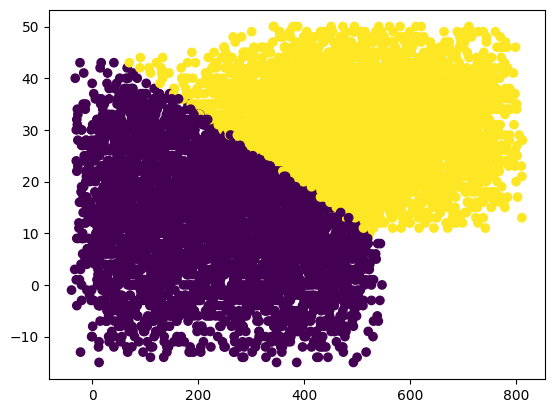

In [70]:
# 7. evaluation
panda = model.toPandas()

plt.scatter(
    panda["calories"],
    panda["fat"],
    c=panda["prediction"]
)

plt.show()